<a href="https://colab.research.google.com/github/stefanoz99/Deber1/blob/main/S3_AA_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FASE 1

Importar librerías y leer el archivo Excel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import load_model

# Leer el archivo Excel
file_path = '/content/DATAPATH/transformadores.xlsx'
xls = pd.ExcelFile(file_path)


Inspeccionar la hoja 'CLIENTES'

In [2]:
# Leer la hoja 'CLIENTES'
df_clientes = pd.read_excel(xls, 'CLIENTES')

# Mostrar las primeras filas y las columnas disponibles
print(df_clientes.head())
print(df_clientes.columns)




  Unnamed: 0 Unnamed: 1         Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0   CodTrafo   kVATrafo  Etiquetas de fila    202211.0      202212   
1    0303491         15              27501       129.0          94   
2    0301254         25              67186        41.0          40   
3    0303356         15              38428        55.0          56   
4    0303512         15               5470         5.0           6   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9    111468  \
0    202301.0    202302.0    202303.0    202304.0    202305.0  Promedio   
1        94.0        99.0        83.0       104.0       117.0       103   
2        41.0        38.0        57.0        43.0        48.0        44   
3        74.0        75.0        64.0        63.0        61.0        64   
4         5.0         5.0         4.0         5.0         5.0         5   

     1475 Unnamed: 12    8  
0  tarifa       TARIF  MES  
1       B          BP  117  
2       R           R   48  
3       R   

Los textos de nombre presentan typos, se necesita renombrar columnas y seleccionar datos

In [3]:
# Renombrar las columnas para facilitar la selección
df_clientes.columns = ['CodTrafo', 'kVATrafo', 'Etiquetas de fila', '202211', '202212', '202301', '202302', '202303', '202304', '202305', 'Promedio', 'tarifa', 'TARIF', 'MES']

# Seleccionar las columnas de interés y renombrarlas
df_clientes = df_clientes[['CodTrafo', 'kVATrafo', 'Promedio']]
df_clientes.columns = ['Transformador', 'Capacidad', 'Total_consumo']
df_clientes['Transformador'] = df_clientes['Transformador'].astype(str)

# Confirmar la dimensión del DataFrame
print(f'Dimensión del DataFrame CLIENTES: {df_clientes.shape}')
print(df_clientes.head())



Dimensión del DataFrame CLIENTES: (6638, 3)
  Transformador Capacidad Total_consumo
0      CodTrafo  kVATrafo      Promedio
1       0303491        15           103
2       0301254        25            44
3       0303356        15            64
4       0303512        15             5


Agrupar datos de 'CLIENTES'

In [4]:
# Agrupar por 'Transformador' y 'Capacidad', obtener suma y conteo
df_clientes_grouped = df_clientes.groupby(['Transformador', 'Capacidad']).agg(
    Total_consumo=('Total_consumo', 'sum'),
    Total_usuarios=('Total_consumo', 'count')
).reset_index()

print(f'Dimensión del DataFrame CLIENTES agrupado: {df_clientes_grouped.shape}')
print(df_clientes_grouped.head())


Dimensión del DataFrame CLIENTES agrupado: (606, 4)
  Transformador Capacidad Total_consumo  Total_usuarios
0       0000000         0          5008             100
1       0020062       150            93               1
2       0020082        50          1585               1
3       0020184        15           342               9
4       0020394        15            52               1


Inspeccionar la hoja 'LUMINARIAS'

In [5]:
# Leer la hoja 'LUMINARIAS'
df_luminarias = pd.read_excel(xls, 'LUMINARIAS')

# Mostrar las primeras filas y las columnas disponibles
print(df_luminarias.head())
print(df_luminarias.columns)



  CODIGOESTR     ESTRUCT  HORASFUNC1  HORASFUNC2  DIASFUNCME  SUBTIPO  \
0    APO0374  LDOS100ACC          12           0         100        4   
1    APO0309  LCPS100ACC          12           0         100        4   
2    APO0379  LDOS150ACC          12           0         100        4   
3    APO0310  LCPS150ACC          12           0         100        4   
4    APO0379  LDOS150ACC          12           0         100        4   

            SUBT  Luminaria.BAJOMEDICION  Luminaria.POTENCIA  POTENCIA_2  ...  \
0  Sodio Cerrada                       0                 100           0  ...   
1  Sodio Cerrada                       0                 100           0  ...   
2  Sodio Cerrada                       0                 150           0  ...   
3  Sodio Cerrada                       0                 250           0  ...   
4  Sodio Cerrada                       0                 100           0  ...   

   VOLTAJE POTENCIA TRAFO    TRAFO KWH Unnamed: 18  ALIMENTA_5.1  03GR010T

Renombrar columnas y seleccionar datos de 'LUMINARIAS'

In [6]:
# Renombrar las columnas para facilitar la selección
df_luminarias.columns = ['CODIGOESTR', 'ESTRUCT', 'HORASFUNC1', 'HORASFUNC2', 'DIASFUNCME',
                         'SUBTIPO', 'SUBT', 'Luminaria.BAJOMEDICION', 'Luminaria.POTENCIA',
                         'POTENCIA_2', 'ALIMENTA_5', 'ALIM', 'SUBTIPO_1', 'TRAF', 'VOLTAJE',
                         'POTENCIA_TRAFO', 'TRAFO', 'KWH', 'Unnamed_18', 'ALIMENTA_5_1',
                         '03GR010T21', 'Unnamed_21', 'Unnamed_22', 'Unnamed_23']

# Seleccionar las columnas de interés, renombrar y filtrar
df_luminarias = df_luminarias[['Luminaria.BAJOMEDICION', 'Luminaria.POTENCIA', 'TRAFO']]
df_luminarias.columns = ['Bajomedicion', 'Potencia', 'Transformador']
df_luminarias = df_luminarias[df_luminarias['Bajomedicion'] == 0]
df_luminarias['Transformador'] = df_luminarias['Transformador'].astype(str)

print(f'Dimensión del DataFrame LUMINARIAS: {df_luminarias.shape}')
print(df_luminarias.head())

Dimensión del DataFrame LUMINARIAS: (3233, 3)
   Bajomedicion  Potencia Transformador
0             0       100       0303303
1             0       100       0303434
2             0       150       0303630
3             0       250       0303486
4             0       100       0303480


Agrupar datos de 'LUMINARIAS'

In [7]:
# Agrupar por 'Transformador', sumar la potencia y dividir entre 1000
df_luminarias_grouped = df_luminarias.groupby('Transformador').agg(
    Demanda_AP=('Potencia', lambda x: x.sum() / 1000)
).reset_index()

print(f'Dimensión del DataFrame LUMINARIAS agrupado: {df_luminarias_grouped.shape}')
print(df_luminarias_grouped.head())



Dimensión del DataFrame LUMINARIAS agrupado: (419, 2)
  Transformador  Demanda_AP
0       0021651        0.30
1       0021657        0.40
2       0021660        0.70
3       0021674        0.75
4       0300002        1.50


Unir DataFrames y guardar

In [8]:
# Unir ambos DataFrames (merge)
df_final = pd.merge(df_clientes_grouped, df_luminarias_grouped, on='Transformador', how='outer')
df_final.fillna(0, inplace=True)

# Eliminar registros con Capacidad = 0
df_final = df_final[df_final['Capacidad'] != 0]

print(f'Dimensión del DataFrame final: {df_final.shape}')
print(df_final.head())

# Guardar el DataFrame final en un archivo CSV para la siguiente fase
df_final.to_csv('data_transf_fase1.csv', index=False)



Dimensión del DataFrame final: (605, 5)
  Transformador Capacidad Total_consumo  Total_usuarios  Demanda_AP
1       0020062       150            93             1.0         0.0
2       0020082        50          1585             1.0         0.0
3       0020184        15           342             9.0         0.0
4       0020394        15            52             1.0         0.0
5       0021203         5            39             1.0         0.0


#Fase 2 - Análisis y Modelado con Red Neuronal

In [9]:
# Cargar el dataset resultante de la Fase I
df_fase1 = pd.read_csv('/content/data_transf_fase1.csv')

# Cargar el archivo adicional 'data_transf.csv'
df_additional = pd.read_csv('/content/DATAPATH/data_transf.csv')

# Unir ambos DataFrames (merge)
df = pd.merge(df_fase1, df_additional, on='Transformador', how='outer')
df.fillna(0, inplace=True)

# Eliminar columnas duplicadas y columnas innecesarias
df = df.drop(columns=['Capacidad_y', 'Total_consumo_y', 'Total_usuarios_y', 'Demanda_AP_y', 'Unnamed: 0'])
df.columns = df.columns.str.replace('_x', '')

# Confirmar el tamaño del DataFrame y los nombres de las columnas
print(f'Dimensión del DataFrame final: {df.shape}')
print(df.head())
print(df.columns)

Dimensión del DataFrame final: (605, 7)
  Transformador Capacidad Total_consumo  Total_usuarios  Demanda_AP  \
0       0020062       150            93             1.0         0.0   
1       0020082        50          1585             1.0         0.0   
2       0020184        15           342             9.0         0.0   
3       0020394        15            52             1.0         0.0   
4       0021203         5            39             1.0         0.0   

   Demanda_usuarios  Cargabilidad  
0          1.034319      0.698628  
1         12.722517     25.780177  
2          2.400556     16.214495  
3          0.618315      4.176396  
4          0.479335      9.712973  
Index(['Transformador', 'Capacidad', 'Total_consumo', 'Total_usuarios',
       'Demanda_AP', 'Demanda_usuarios', 'Cargabilidad'],
      dtype='object')


Convertir las columnas numéricas (Ajustada según los nombres correctos de las columnas)

In [10]:
# Convertir las columnas numéricas
numeric_columns = ['Capacidad', 'Total_consumo', 'Total_usuarios', 'Demanda_AP', 'Demanda_usuarios', 'Cargabilidad']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Asegurar que 'y' tenga las mismas filas que 'X'
df_clean = df.drop(columns=['Transformador']).apply(pd.to_numeric, errors='coerce').dropna()
X = df_clean.drop(['Cargabilidad'], axis=1)
y = df_clean['Cargabilidad']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2024)



Análisis exploratorio de datos (EDA)

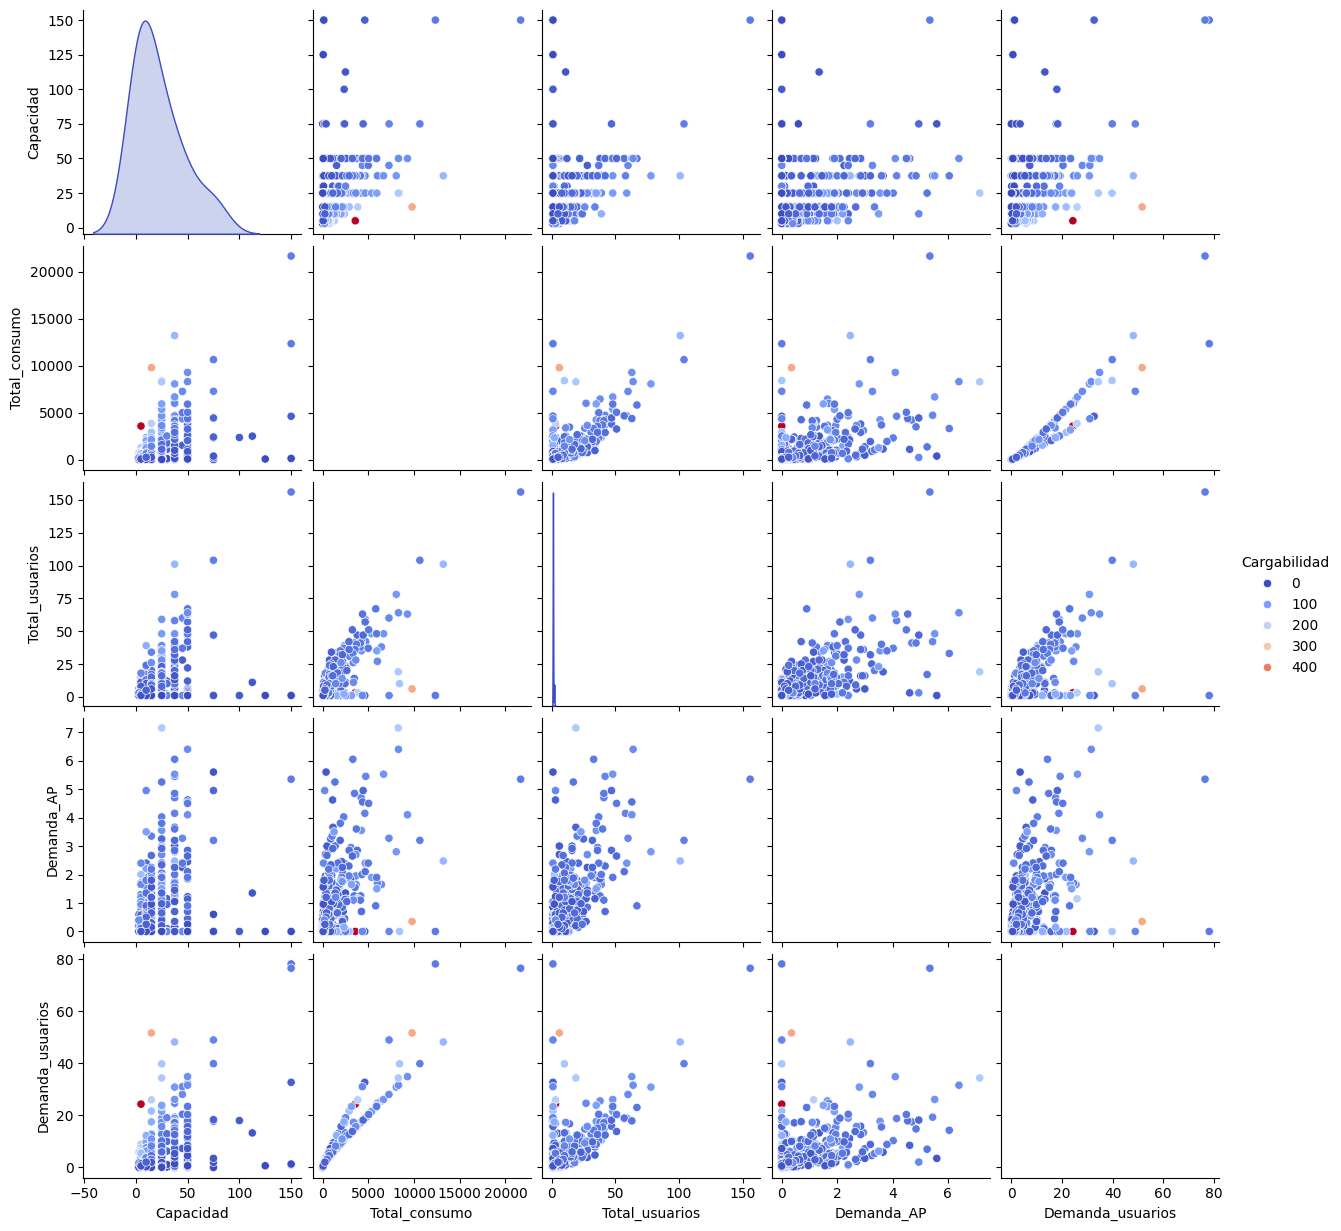

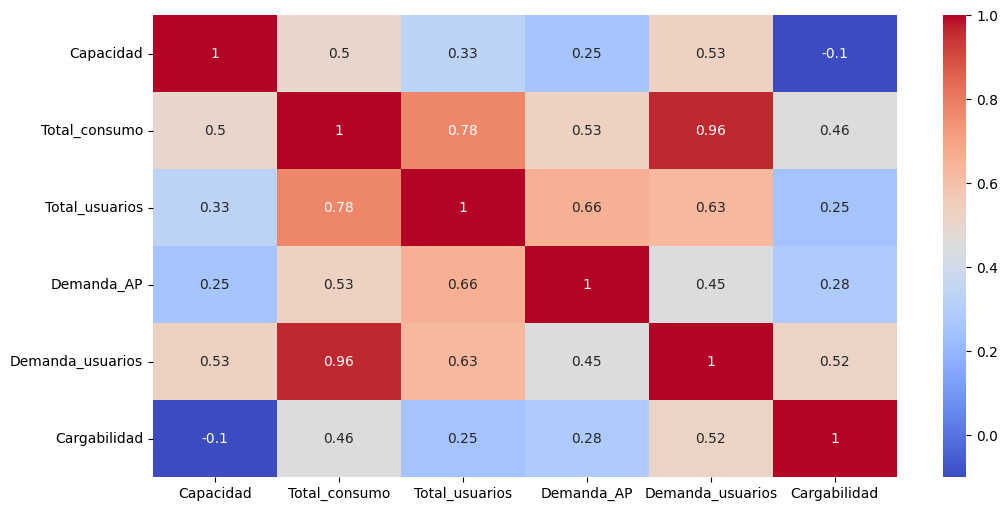

In [11]:
# Análisis exploratorio de datos (EDA)
# Gráficas para visualizar la distribución de los datos con color
sns.pairplot(df_clean, hue='Cargabilidad', palette='coolwarm')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()


Construir y entrenar la red neuronal

In [12]:
# Construir la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, callbacks=[early_stopping])



Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 2437.0176 - mae: 33.2327 - mse: 2437.0176 - val_loss: 2325.2654 - val_mae: 36.7914 - val_mse: 2325.2654
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 2330.9121 - mae: 31.9485 - mse: 2330.9121 - val_loss: 2180.7917 - val_mae: 35.0968 - val_mse: 2180.7917
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 2098.0322 - mae: 29.5493 - mse: 2098.0322 - val_loss: 1906.2120 - val_mae: 31.9655 - val_mse: 1906.2120
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 1778.6538 - mae: 25.5322 - mse: 1778.6538 - val_loss: 1507.8259 - val_mae: 27.2302 - val_mse: 1507.8259
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 1446.2322 - mae: 21.7154 - mse: 1446.2322 - val_loss: 1178.8488 - val_mae: 23.1116 - val_mse: 1178.8488
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 1321.5697 - mae: 20.0999 - mse: 1321.5697

Graficar los resultados del entrenamiento

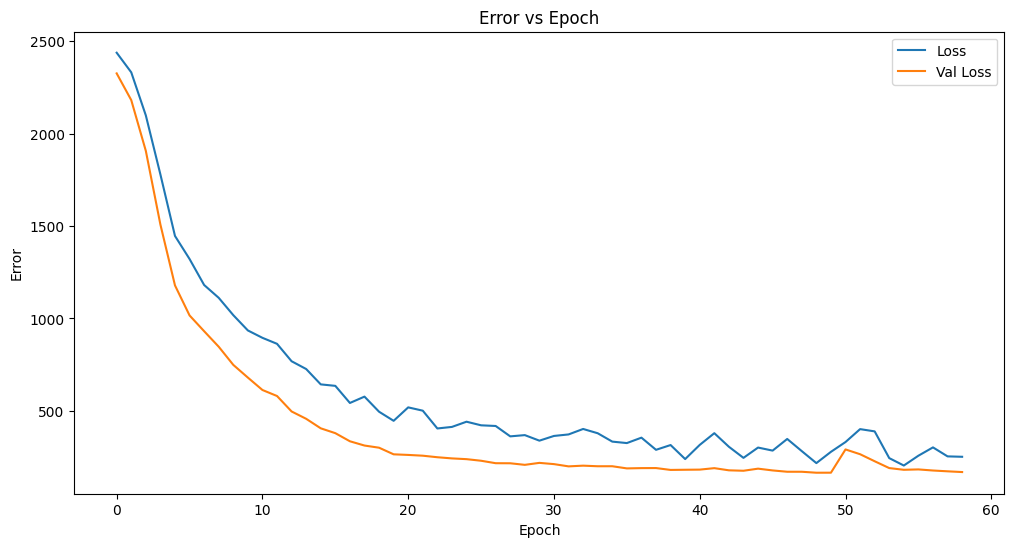

In [13]:
# Graficar los resultados del entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()


Evaluar y guardar el modelo

In [14]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test)
print(f'MAE en el conjunto de prueba: {test_mae}')
print(f'MSE en el conjunto de prueba: {test_mse}')

# Guardar el modelo
model.save('modelo_nn.keras')


4/4 [==============================] - 0s 4ms/step - loss: 108.1553 - mae: 7.4411 - mse: 108.1553
MAE en el conjunto de prueba: 7.441096305847168
MSE en el conjunto de prueba: 108.15532684326172


#Fase 3 - Modelos KNN y Random Forest

Cargar datasets y normalizar los datos

In [15]:
# Cargar el dataset final de la Fase II
df = pd.read_csv('data_transf_fase1.csv')

# Unir con el archivo adicional 'data_transf.csv'
df_additional = pd.read_csv('/content/DATAPATH/data_transf.csv')
df = pd.merge(df, df_additional, on='Transformador', how='outer')
df.fillna(0, inplace=True)

# Eliminar columnas duplicadas y columnas innecesarias
df = df.drop(columns=['Capacidad_y', 'Total_consumo_y', 'Total_usuarios_y', 'Demanda_AP_y', 'Unnamed: 0'])
df.columns = df.columns.str.replace('_x', '')

# Convertir las columnas numéricas
numeric_columns = ['Capacidad', 'Total_consumo', 'Total_usuarios', 'Demanda_AP', 'Demanda_usuarios', 'Cargabilidad']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Asegurar que 'y' tenga las mismas filas que 'X'
df_clean = df.drop(columns=['Transformador']).apply(pd.to_numeric, errors='coerce').dropna()
X = df_clean.drop(['Cargabilidad'], axis=1)
y = df_clean['Cargabilidad']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2024)


Modelo KNN

In [16]:
# Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)

print(f'KNN - MAE: {knn_mae}')
print(f'KNN - MSE: {knn_mse}')


KNN - MAE: 10.320640012752648
KNN - MSE: 851.8704815867891


Modelo Random Forest

In [17]:
# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=2024)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest - MAE: {rf_mae}')
print(f'Random Forest - MSE: {rf_mse}')


Random Forest - MAE: 5.841196986742369
Random Forest - MSE: 338.3855370230636


Comparar resultados con la red neuronal

In [18]:
# Cargar el modelo de red neuronal
model_nn = load_model('modelo_nn.keras')

# Evaluar el modelo de red neuronal en el conjunto de prueba
y_pred_nn = model_nn.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)

print(f'Red Neuronal - MAE: {nn_mae}')
print(f'Red Neuronal - MSE: {nn_mse}')

# Comparar los resultados
results = pd.DataFrame({
    'Modelo': ['KNN', 'Random Forest', 'Red Neuronal'],
    'MAE': [knn_mae, rf_mae, nn_mae],
    'MSE': [knn_mse, rf_mse, nn_mse]
})

print(results)


4/4 [==============================] - 0s 2ms/step
Red Neuronal - MAE: 7.441096781537363
Red Neuronal - MSE: 108.15535065539218
          Modelo        MAE         MSE
0            KNN  10.320640  851.870482
1  Random Forest   5.841197  338.385537
2   Red Neuronal   7.441097  108.155351


Comparar resultados

          Modelo        MAE         MSE
0            KNN  10.320640  851.870482
1  Random Forest   5.841197  338.385537
2   Red Neuronal   7.441097  108.155351


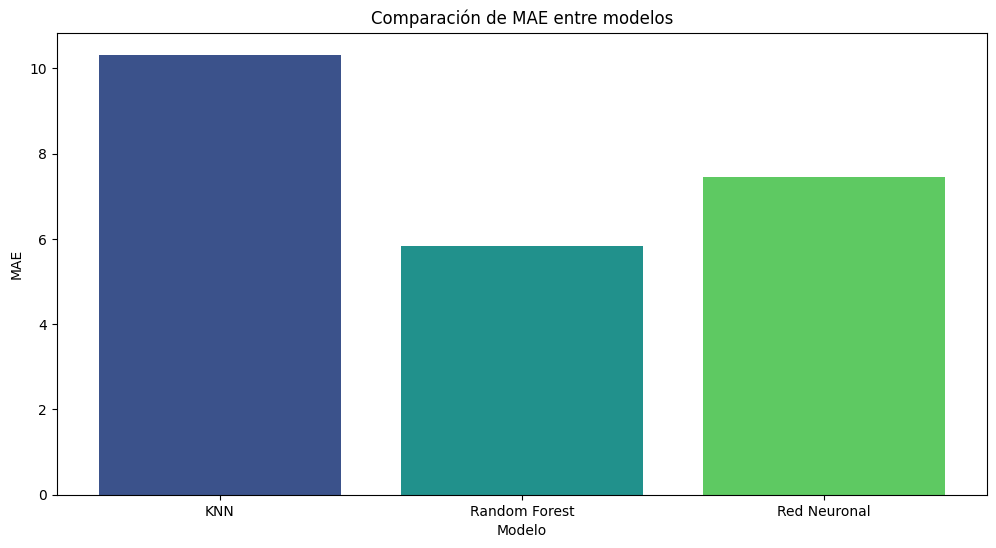

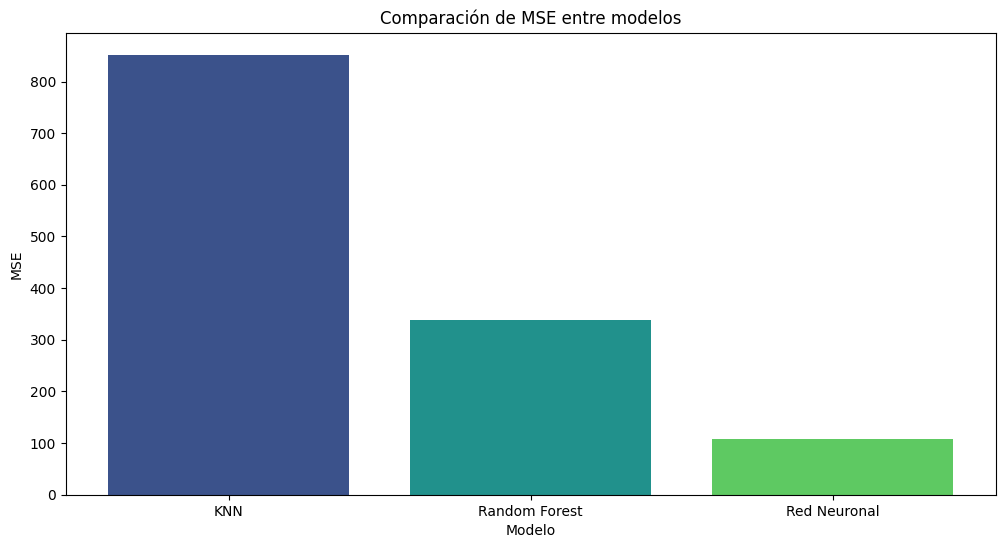

In [19]:
# Comparar los resultados
results = pd.DataFrame({
    'Modelo': ['KNN', 'Random Forest', 'Red Neuronal'],
    'MAE': [knn_mae, rf_mae, nn_mae],
    'MSE': [knn_mse, rf_mse, nn_mse]
})

print(results)

# Definir una paleta de colores
colors = sns.color_palette("viridis", 3)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(results['Modelo'], results['MAE'], color=colors)
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.title('Comparación de MAE entre modelos')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(results['Modelo'], results['MSE'], color=colors)
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')
plt.show()


